Data Setup & Preprocessing

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
print("Shape:", df.shape)
df.head()

Shape: (60218, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:

from sklearn.preprocessing import StandardScaler  # or MinMaxScaler

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
print("Original Shape:", df.shape)

# Overview of missing data
missing = df.isnull().sum()

# Drop columns with >40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after removing outliers:", df_no_outliers.shape)

# Normalize numeric columns
scaler = StandardScaler()  # or MinMaxScaler()
df_scaled = df_no_outliers.copy()
df_scaled[num_cols] = scaler.fit_transform(df_no_outliers[num_cols])

# Print basic info and normalized data
print("\nDataFrame Info:")
df_scaled.info()

print("\nSummary Statistics:")
print(df_scaled.describe())

print("\nNormalized Data (first 10 rows):")
print(df_scaled[num_cols].head(10))

# Optional: check remaining missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nRemaining Missing Values:\n", missing)


Original Shape: (60218, 41)
Shape after removing outliers: (25425, 41)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 25425 entries, 0 to 60217
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       25425 non-null  object 
 1   location_name                 25425 non-null  object 
 2   latitude                      25425 non-null  float64
 3   longitude                     25425 non-null  float64
 4   timezone                      25425 non-null  object 
 5   last_updated_epoch            25425 non-null  float64
 6   last_updated                  25425 non-null  object 
 7   temperature_celsius           25425 non-null  float64
 8   temperature_fahrenheit        25425 non-null  float64
 9   condition_text                25425 non-null  object 
 10  wind_mph                      25425 non-null  float64
 11  wind_kph                      25425 

In [7]:
# Basic summary of key features
features = ['temperature_celsius', 'precip_in', 'humidity', 'wind_kph', 'pressure_mb']
df_scaled[features].describe()


,temperature_celsius,precip_in,humidity,wind_kph,pressure_mb
count,2.542500e+04,2.542500e+04,2.542500e+04,2.542500e+04,2.542500e+04
mean,-3.130021e-16,-3.577167e-17,1.106686e-16,3.241808e-17,8.278906e-15
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-3.072465e+00,-2.404597e+00,-1.098132e+00,-1.588699e+00,-2.796525e+00
25%,-4.930927e-01,-7.738318e-01,-9.982182e-01,-8.355394e-01,-6.122499e-01
50%,2.237901e-01,1.273808e-01,-2.655162e-01,-1.113475e-01,-5.057920e-02
75%,6.525142e-01,8.140190e-01,5.670997e-01,8.156181e-01,5.110915e-01
max,2.732880e+00,1.801061e+00,2.232332e+00,1.877766e+00,2.695366e+00


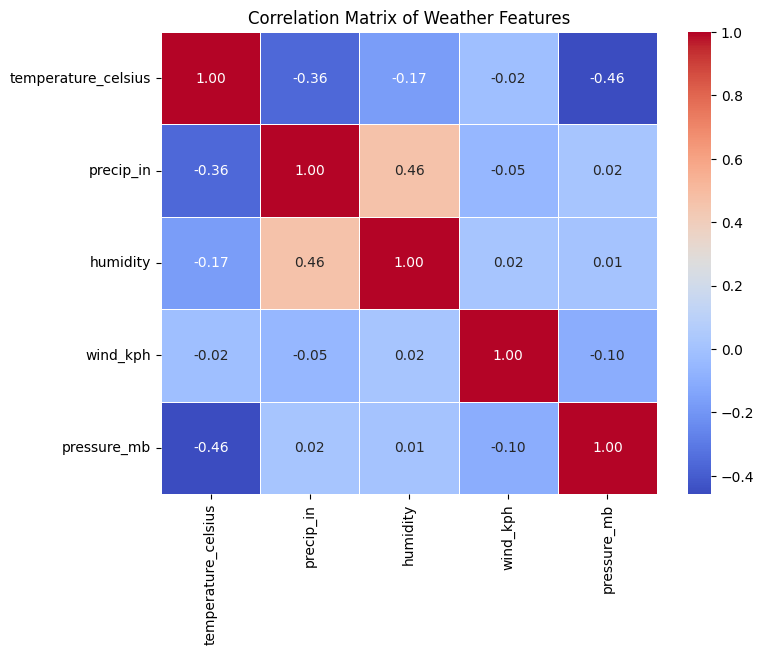

In [8]:
df_scaled[['temperature_celsius', 'precip_in', 'humidity', 'wind_kph', 'pressure_mb']].describe()
import seaborn as sns
import matplotlib.pyplot as plt

# Focused numeric features
features = ['temperature_celsius', 'precip_in', 'humidity', 'wind_kph', 'pressure_mb']
corr = df_scaled[features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Weather Features")
plt.show()


C:\Users\Emil Saj Abraham\AppData\Local\Temp\ipykernel_3660\2982905259.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = df_time[features].resample('M').mean()


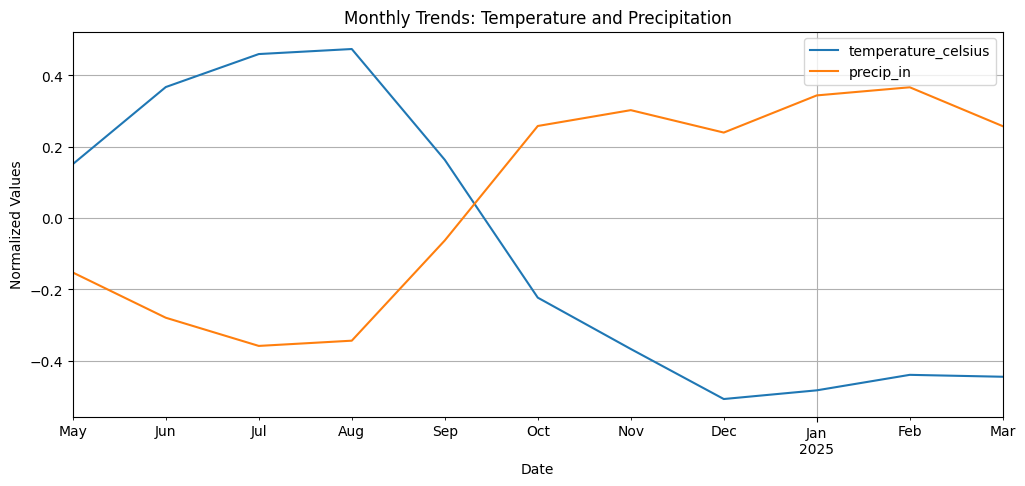

In [9]:
# Ensure datetime
df_scaled['last_updated'] = pd.to_datetime(df_scaled['last_updated'])
df_time = df_scaled.set_index('last_updated')

# Monthly averages
monthly_trends = df_time[features].resample('M').mean()
monthly_trends[['temperature_celsius', 'precip_in']].plot(figsize=(12, 5), grid=True)
plt.title("Monthly Trends: Temperature and Precipitation")
plt.xlabel("Date")
plt.ylabel("Normalized Values")
plt.show()



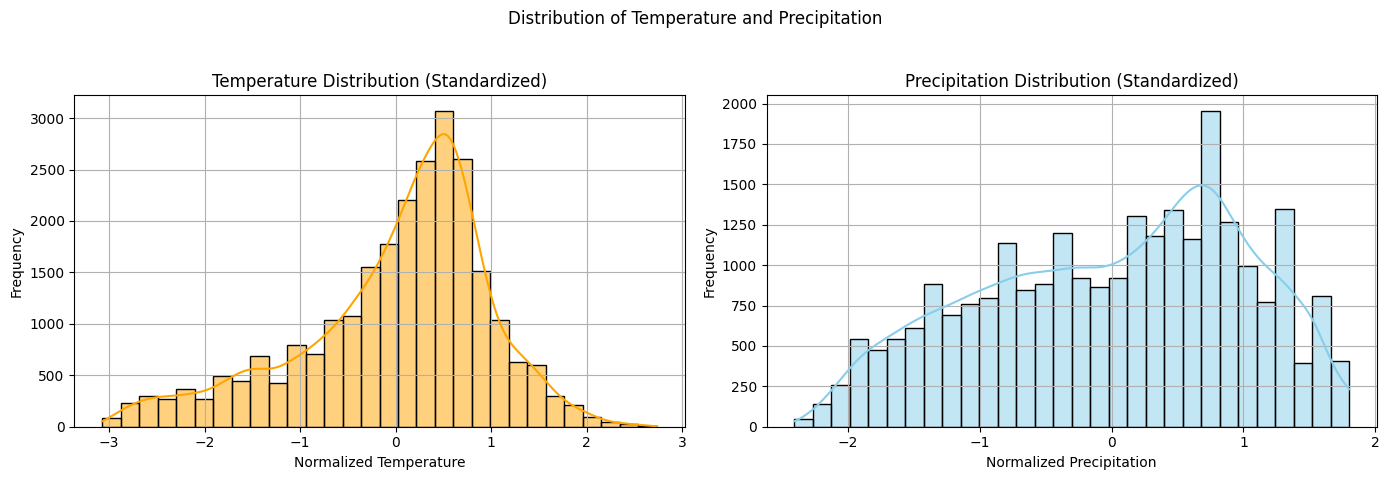

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature distribution
sns.histplot(df_scaled['temperature_celsius'], bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title("Temperature Distribution (Standardized)")
axes[0].set_xlabel("Normalized Temperature")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Precipitation distribution
sns.histplot(df_scaled['precip_in'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title("Precipitation Distribution (Standardized)")
axes[1].set_xlabel("Normalized Precipitation")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Overall layout
plt.suptitle("Distribution of Temperature and Precipitation")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Model Building

d:\JUNK\Anaconda\Miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.



📈 Forecasting 'temperature_celsius' with Prophet...



18:46:16 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] done processing


🔍 Evaluation for 'temperature_celsius':
MAE:  0.9612
RMSE: 1.1167
MAPE: 397.81%
R²:   -0.0112


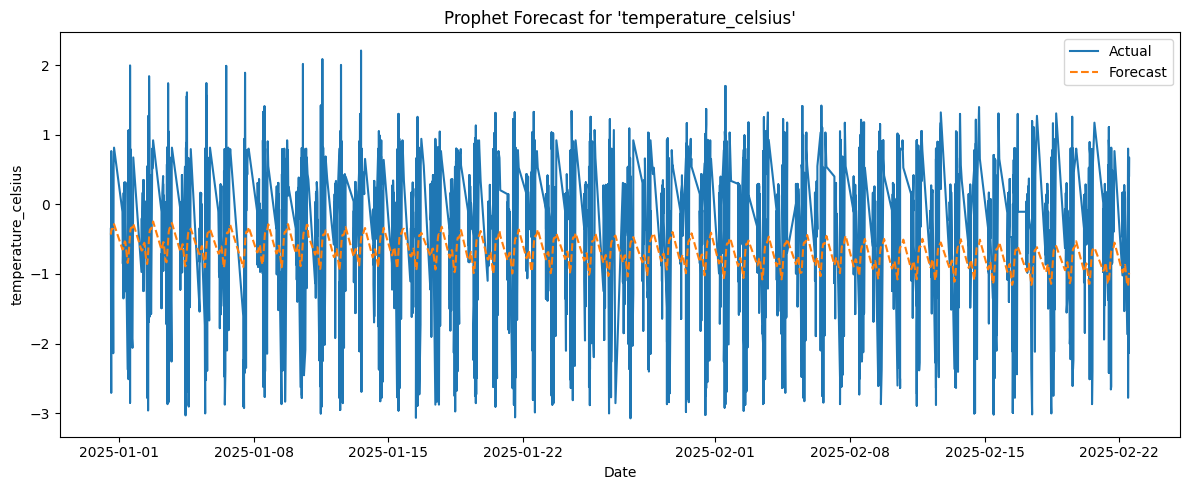


📈 Forecasting 'precip_in' with Prophet...



18:46:25 - cmdstanpy - INFO - Chain [1] start processing
18:46:27 - cmdstanpy - INFO - Chain [1] done processing


🔍 Evaluation for 'precip_in':
MAE:  0.5466
RMSE: 0.6936
MAPE: 340.69%
R²:   0.3761


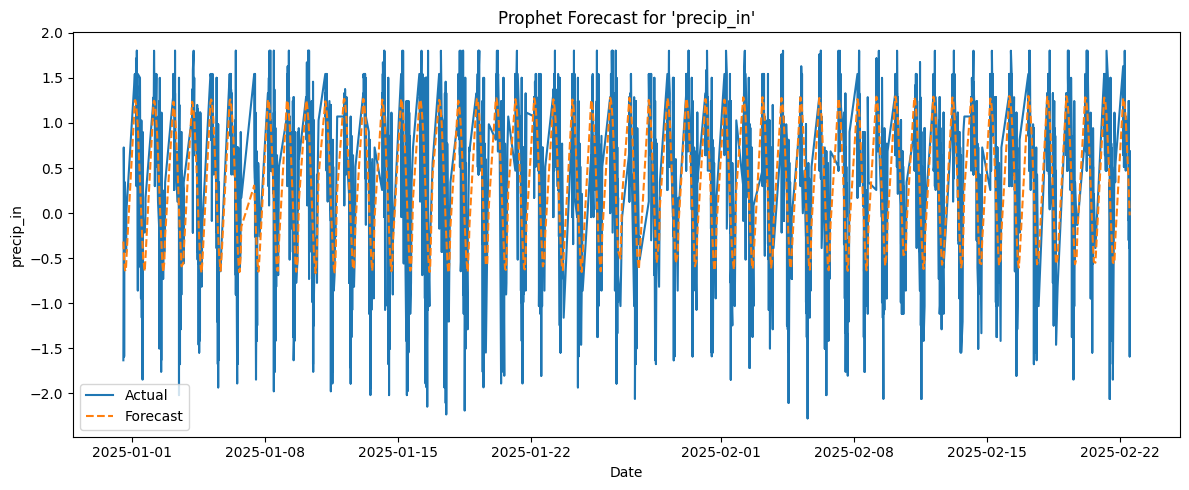

In [13]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🧹 Step 1: Prepare datetime column
df_scaled['ds'] = pd.to_datetime(df_scaled['last_updated'])
df_scaled = df_scaled.sort_values('ds')

# ⚙️ Step 2: Prophet function
def run_prophet_forecast(df, target_col, scaler=None, test_size_ratio=0.2):
    print(f"\n📈 Forecasting '{target_col}' with Prophet...\n")

    # Step 1: Create Prophet DataFrame
    df_prophet = df[['ds', target_col]].rename(columns={target_col: 'y'})

    # Step 2: Scale (optional)
    if scaler:
        df_prophet['y'] = scaler.transform(df[[target_col]])

    # Step 3: Train-test split
    split_index = int(len(df_prophet) * (1 - test_size_ratio))
    train = df_prophet.iloc[:split_index]
    test = df_prophet.iloc[split_index:]

    # Step 4: Fit Prophet
    model = Prophet()
    model.fit(train)

    # Step 5: Make future dataframe & forecast
    future = model.make_future_dataframe(periods=len(test), freq='15min')
    forecast = model.predict(future)

    # Step 6: Align predictions with actuals using merge
    merged = pd.merge(test, forecast[['ds', 'yhat']], on='ds', how='inner')
    true = merged['y']
    predicted = merged['yhat']

    # Step 7: Evaluation (metrics on scaled or unscaled depending on step 8)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / (true + 1e-8))) * 100
    r2 = r2_score(true, predicted)

    # Step 8: Inverse transform if scaled
    if scaler:
        true = scaler.inverse_transform(np.array(true).reshape(-1, 1)).flatten()
        predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

    # Step 9: Print results
    print(f"🔍 Evaluation for '{target_col}':")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²:   {r2:.4f}")

    # Step 10: Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(merged['ds'], true, label='Actual')
    plt.plot(merged['ds'], predicted, label='Forecast', linestyle='--')
    plt.title(f"Prophet Forecast for '{target_col}'")
    plt.xlabel("Date")
    plt.ylabel(target_col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🧪 Step 3: Scale target variables
scaler_temp = StandardScaler()
scaler_precip = StandardScaler()
df_scaled['temperature_celsius'] = scaler_temp.fit_transform(df_scaled[['temperature_celsius']])
df_scaled['precip_in'] = scaler_precip.fit_transform(df_scaled[['precip_in']])

# ✅ Step 4: Run Prophet forecasts
run_prophet_forecast(df_scaled, 'temperature_celsius', scaler_temp)
run_prophet_forecast(df_scaled, 'precip_in', scaler_precip)


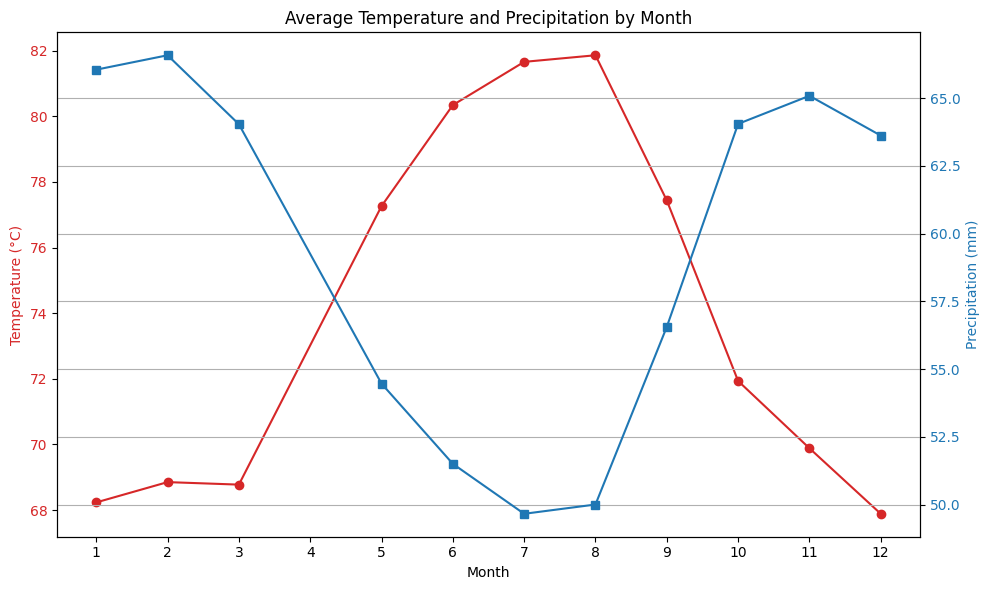

In [12]:
import matplotlib.pyplot as plt

# Prepare data
monthly_data = df_no_outliers.copy()
monthly_data['last_updated'] = pd.to_datetime(monthly_data['last_updated'])
monthly_data['month'] = monthly_data['last_updated'].dt.month

# Group by month
monthly_avg = monthly_data.groupby('month').agg({
    'temperature_celsius': 'mean',
    'precip_in': 'mean'
})

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:red'

ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color=color1)
ax1.plot(monthly_avg.index, monthly_avg['temperature_celsius'], marker='o', color=color1, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color1)

# Second y-axis for precipitation
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color2)
ax2.plot(monthly_avg.index, monthly_avg['precip_in'], marker='s', color=color2, label='Precipitation')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Average Temperature and Precipitation by Month")
plt.xticks(range(1,13))
fig.tight_layout()
plt.grid(True)
plt.show()


Advanced EDA

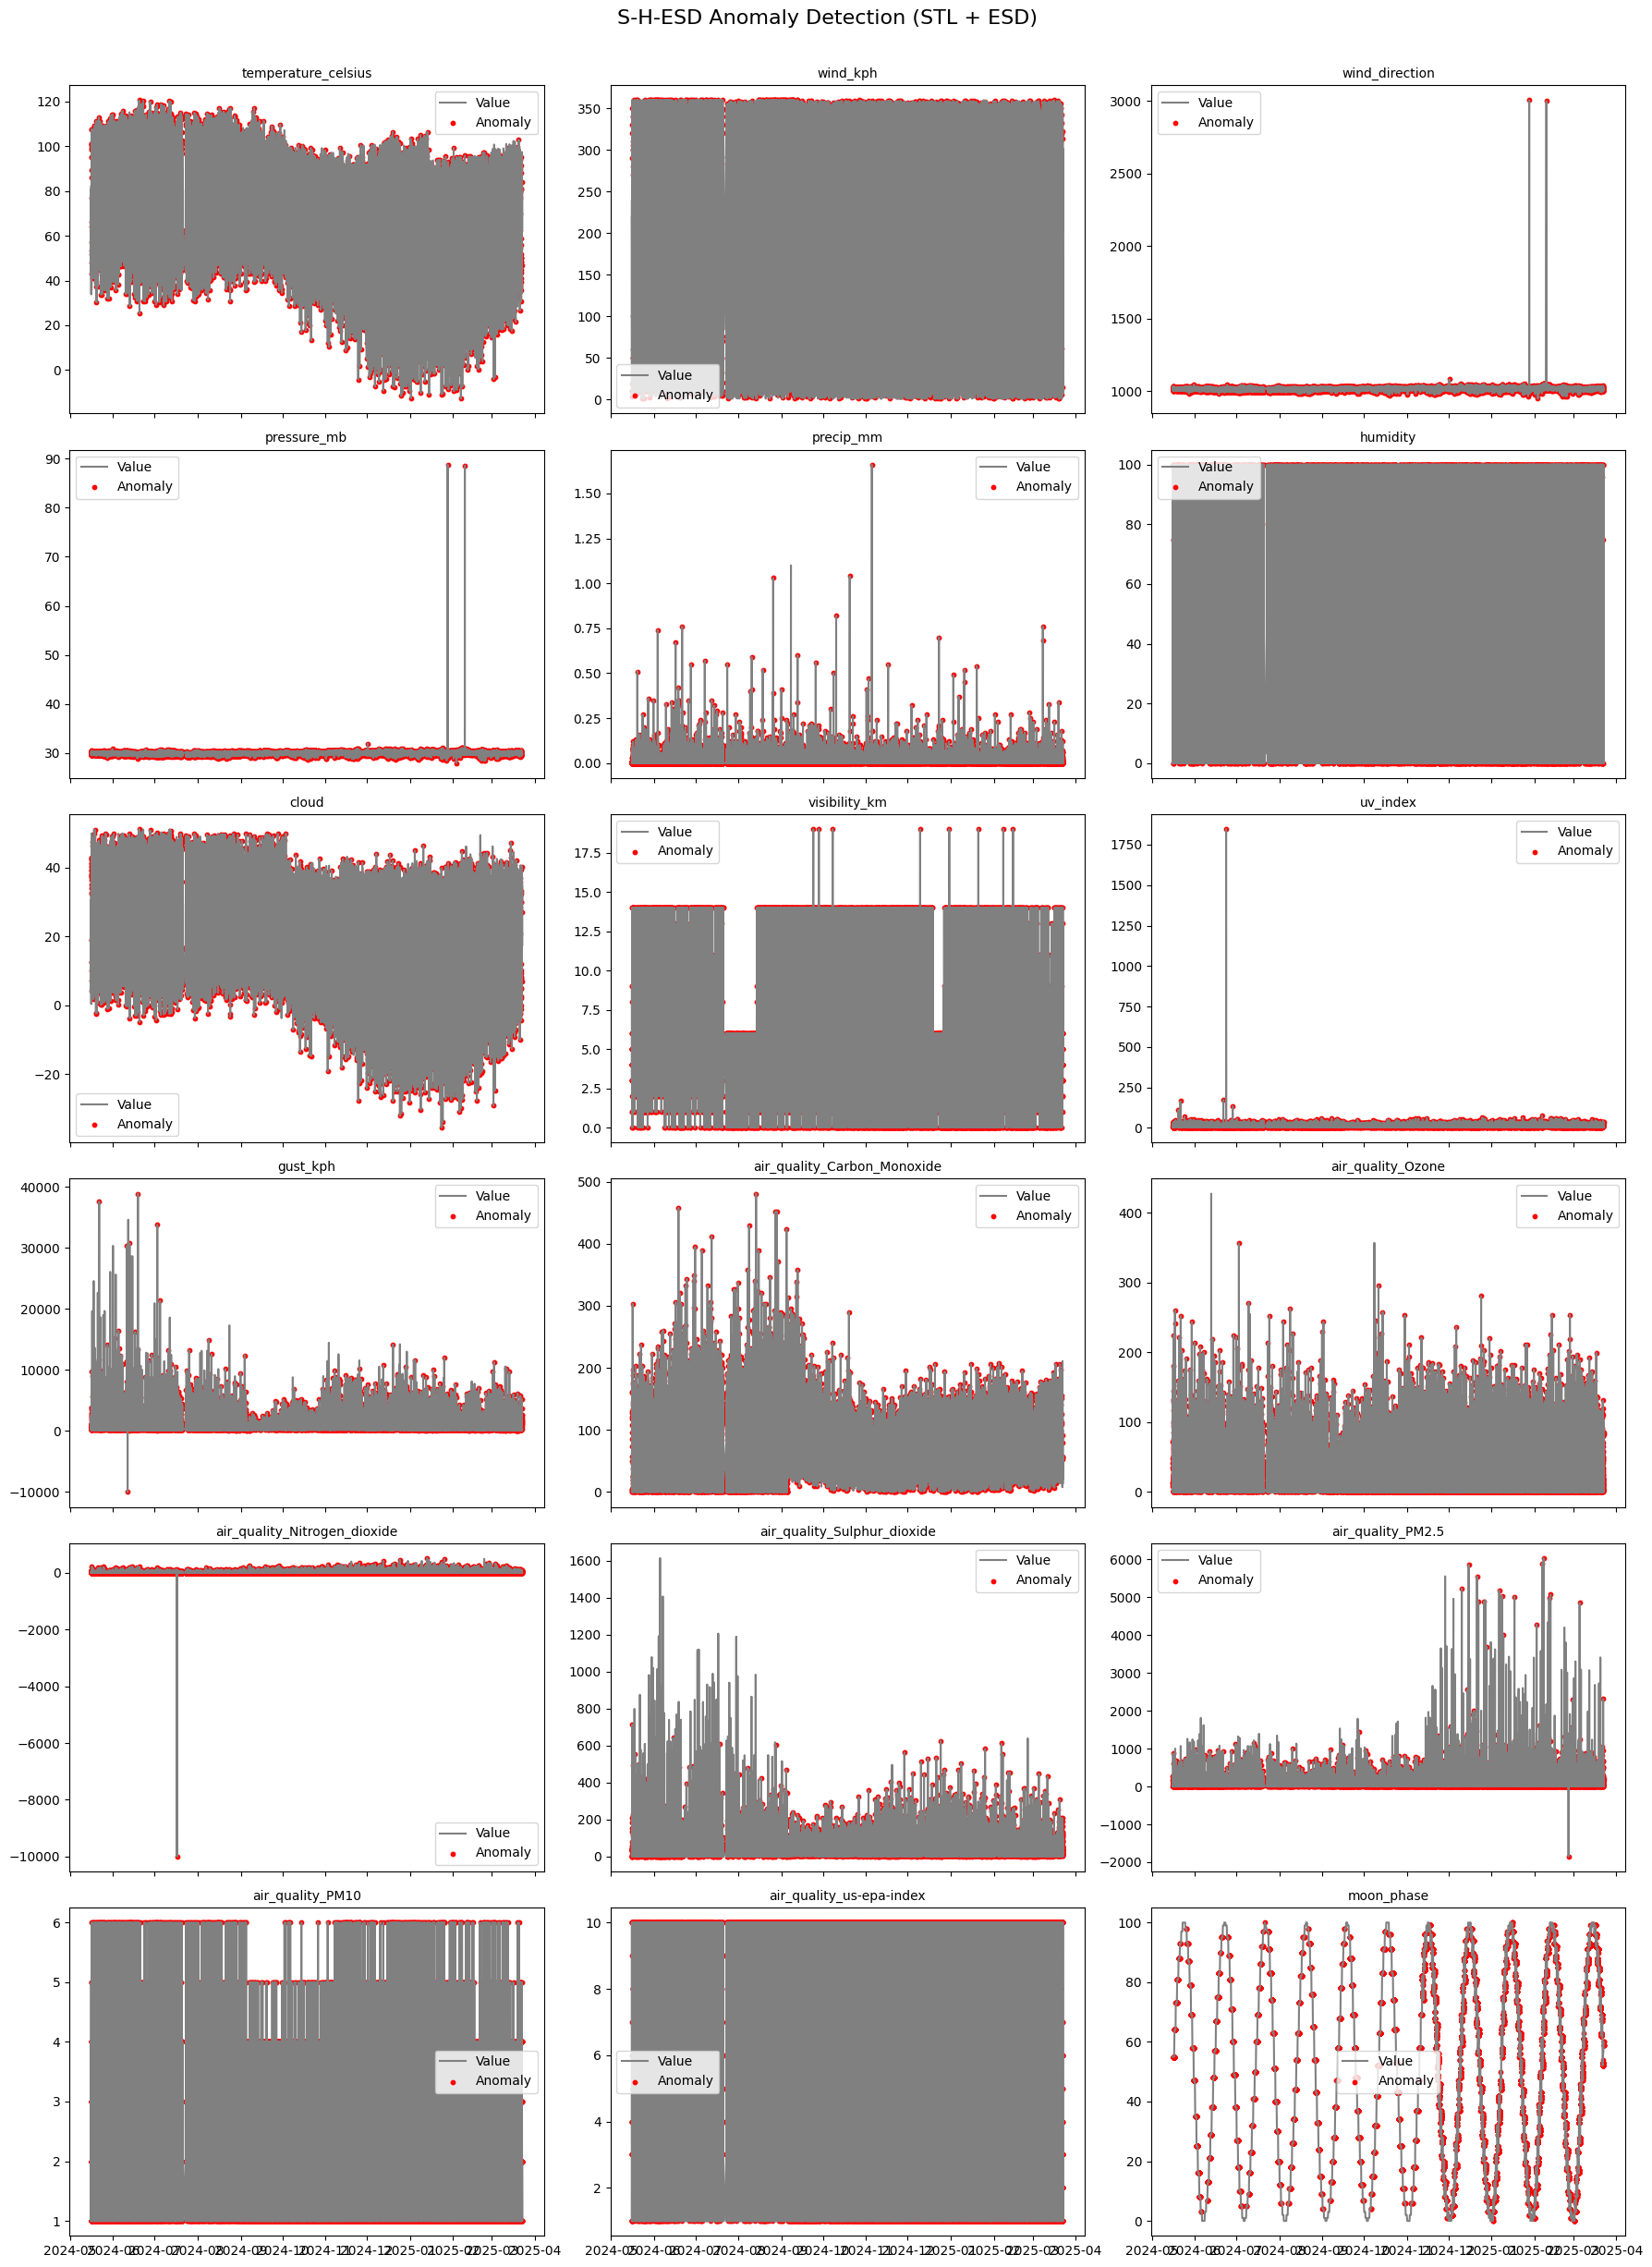

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.stats import norm

# Load your dataset (replace with your actual path or DataFrame)
# df = pd.read_csv('your_data.csv')
# Ensure 'last_updated' is datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])
df = df.sort_values('last_updated')

features = [
    "temperature_celsius", "wind_kph", "wind_degree", "wind_direction",
    "pressure_mb", "precip_mm", "humidity", "cloud", "visibility_km", "uv_index", "gust_kph",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10",
    "air_quality_us-epa-index", "air_quality_gb-defra-index",
    "sunrise", "sunset", "moonrise", "moonset", "moon_phase"
]




# Drop non-numeric features for anomaly detection
numeric_features = [col for col in features if pd.api.types.is_numeric_dtype(df[col])]

def detect_anomalies_stl_esd(series, time_col='last_updated', alpha=0.05, max_anomalies=0.1):
    """Detect anomalies using STL + ESD."""
    series = series.dropna()
    if len(series) < 30:
        return pd.Series([False] * len(series), index=series.index)  # Not enough data

    stl = STL(series, period=96, robust=True)  # 96 = 1 day at 15-min intervals
    result = stl.fit()
    resid = result.resid

    # Use modified z-score method for ESD detection
    median = np.median(resid)
    mad = np.median(np.abs(resid - median))
    z_scores = 0.6745 * (resid - median) / (mad + 1e-8)
    threshold = norm.ppf(1 - alpha / 2)
    anomalies = np.abs(z_scores) > threshold

    return anomalies

# Detect anomalies for each numeric feature and plot in subplots
n_cols = 3
n_rows = int(np.ceil(len(numeric_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4), sharex=True)
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    series = df.set_index('last_updated')[feature]
    anomalies = detect_anomalies_stl_esd(series)

    ax = axes[i]
    ax.plot(series.index, series, label='Value', color='gray')
    ax.scatter(series.index[anomalies], series[anomalies], color='red', label='Anomaly', s=10)
    ax.set_title(feature, fontsize=10)
    ax.legend()

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('S-H-ESD Anomaly Detection (STL + ESD)', fontsize=16, y=1.02)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.vector_ar.var_model import VAR
from fbprophet import Prophet
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load preprocessed data
df = pd.read_csv("GlobalWeatherRepository.csv", parse_dates=['last_updated'], index_col='last_updated')

# Select features
features = ["temperature_celsius", "precip_mm"]
df = df[features].dropna()

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Function to evaluate models
def evaluate_forecast(true_values, predictions, model_name):
    mae = mean_absolute_error(true_values, predictions)
    print(f"{model_name} MAE: {mae:.4f}")
    return mae

# 1️⃣ ARIMA Model
arima_model = ARIMA(train['temperature_celsius'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

# 2️⃣ Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(train['temperature_celsius'], trend='add', seasonal='add', seasonal_periods=96)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(test))

# 3️⃣ Facebook Prophet
prophet_df = train.reset_index().rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = pd.DataFrame({'ds': test.index})
prophet_forecast = prophet_model.predict(future)['yhat'].values

# 4️⃣ XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(np.arange(len(train)).reshape(-1,1), train['temperature_celsius'])
xgb_forecast = xgb_model.predict(np.arange(len(train), len(train)+len(test)).reshape(-1,1))

# 5️⃣ VAR Model (Multivariate Forecasting)
var_model = VAR(train)
var_fit = var_model.fit(5)
var_forecast = var_fit.forecast(var_fit.endog, steps=len(test))
var_forecast = pd.DataFrame(var_forecast, columns=train.columns)['temperature_celsius'].values

# Combine Forecasts using Weighted Averaging
forecasts = np.array([arima_forecast, hw_forecast, prophet_forecast, xgb_forecast, var_forecast])
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Equal weighting (Can be optimized)
ensemble_forecast = np.sum(forecasts * weights[:, None], axis=0)

# Evaluate models
evaluate_forecast(test['temperature_celsius'], arima_forecast, "ARIMA")
evaluate_forecast(test['temperature_celsius'], hw_forecast, "Holt-Winters")
evaluate_forecast(test['temperature_celsius'], prophet_forecast, "Prophet")
evaluate_forecast(test['temperature_celsius'], xgb_forecast, "XGBoost")
evaluate_forecast(test['temperature_celsius'], var_forecast, "VAR")
ensemble_mae = evaluate_forecast(test['temperature_celsius'], ensemble_forecast, "Ensemble")

# Plot Results
plt.figure(figsize=(12,6))
plt.plot(test.index, test['temperature_celsius'], label="Actual", color="black")
plt.plot(test.index, ensemble_forecast, label="Ensemble Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("Temperature Forecast - Ensemble Model")
plt.show()
